In [ ]:
# Install libraries 
!pip install python-docx
!pip install scikit-learn
!pip install wordcloud
!pip install matplotlib

In [2]:
#import required packages
import os
from docx import Document
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [16]:
from docx import Document

file_path = "SCD_ClinicalNoteDec24.docx" 

try:
    doc = Document(file_path)
    content = " ".join([p.text for p in doc.paragraphs])
    print("File Content:")
    print(content)
except Exception as e:
    print(f"Error: {e}")

File Content:
Clinical Note 1 Date: 12/01/2024
Patient Name: John Smith
DOB: 01/15/2001
Chief Complaint: Acute chest pain and shortness of breath Subjective:
The patient is a 23-year-old male with a known history of sickle cell disease (HbSS genotype) who presents to the clinic with 2 days of worsening chest pain and shortness of breath. The pain is described as sharp, primarily in the left lower chest, 8/10 in severity, worse with inspiration, and not alleviated by over-the-counter pain medications. He reports fatigue, intermittent fevers, and a nonproductive cough. No history of similar symptoms since his last vaso-occlusive crisis (VOC) 6 months ago. Objective: Vitals: BP 130/85, HR 98, Temp 101.2°F, RR 22, SpO2 94% on room air General: Alert and oriented, appears uncomfortable. Cardiovascular: Tachycardic, no murmurs, rubs, or gallops. Respiratory: Decreased breath sounds over the left lung base, mild crackles, no wheezing. Abdomen: Soft, non-tender, no organomegaly. Extremities: N

In [23]:
content

'Clinical Note 1 Date: 12/01/2024\nPatient Name: John Smith\nDOB: 01/15/2001\nChief Complaint: Acute chest pain and shortness of breath Subjective:\nThe patient is a 23-year-old male with a known history of sickle cell disease (HbSS genotype) who presents to the clinic with 2 days of worsening chest pain and shortness of breath. The pain is described as sharp, primarily in the left lower chest, 8/10 in severity, worse with inspiration, and not alleviated by over-the-counter pain medications. He reports fatigue, intermittent fevers, and a nonproductive cough. No history of similar symptoms since his last vaso-occlusive crisis (VOC) 6 months ago. Objective: Vitals: BP 130/85, HR 98, Temp 101.2°F, RR 22, SpO2 94% on room air General: Alert and oriented, appears uncomfortable. Cardiovascular: Tachycardic, no murmurs, rubs, or gallops. Respiratory: Decreased breath sounds over the left lung base, mild crackles, no wheezing. Abdomen: Soft, non-tender, no organomegaly. Extremities: No swellin

In [24]:
clinical_notes = content
clinical_notes

'Clinical Note 1 Date: 12/01/2024\nPatient Name: John Smith\nDOB: 01/15/2001\nChief Complaint: Acute chest pain and shortness of breath Subjective:\nThe patient is a 23-year-old male with a known history of sickle cell disease (HbSS genotype) who presents to the clinic with 2 days of worsening chest pain and shortness of breath. The pain is described as sharp, primarily in the left lower chest, 8/10 in severity, worse with inspiration, and not alleviated by over-the-counter pain medications. He reports fatigue, intermittent fevers, and a nonproductive cough. No history of similar symptoms since his last vaso-occlusive crisis (VOC) 6 months ago. Objective: Vitals: BP 130/85, HR 98, Temp 101.2°F, RR 22, SpO2 94% on room air General: Alert and oriented, appears uncomfortable. Cardiovascular: Tachycardic, no murmurs, rubs, or gallops. Respiratory: Decreased breath sounds over the left lung base, mild crackles, no wheezing. Abdomen: Soft, non-tender, no organomegaly. Extremities: No swellin

### With 10 records of SCD Data

[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic 1:
['pain', 'fever', 'sickle', 'cell', 'disease']
Topic 2:
['98', 'noted', '10', 'reports', 'pain']


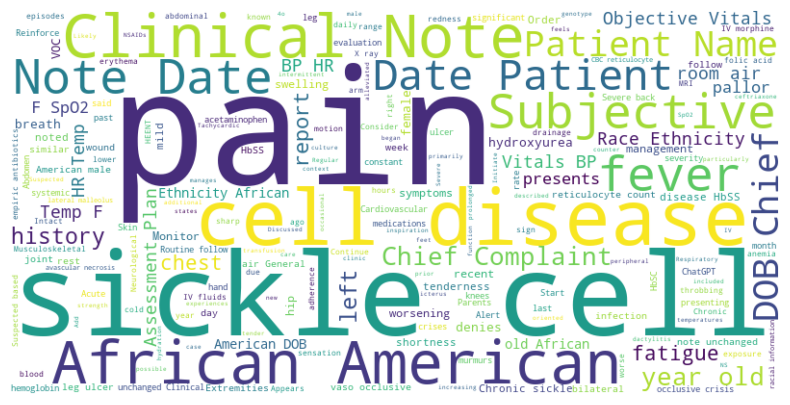

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize

#Check for NLTK
nltk.download('punkt')

# Example clinical notes as a single block of text
clinical_notes = """
Clinical Note 1 Date: 12/01/2024\nPatient Name: John Smith\nDOB: 01/15/2001\nChief Complaint: Acute chest pain and shortness of breath Subjective:\nThe patient is a 23-year-old male with a known history of sickle cell disease (HbSS genotype) who presents to the clinic with 2 days of worsening chest pain and shortness of breath. The pain is described as sharp, primarily in the left lower chest, 8/10 in severity, worse with inspiration, and not alleviated by over-the-counter pain medications. He reports fatigue, intermittent fevers, and a nonproductive cough. No history of similar symptoms since his last vaso-occlusive crisis (VOC) 6 months ago. Objective: Vitals: BP 130/85, HR 98, Temp 101.2°F, RR 22, SpO2 94% on room air General: Alert and oriented, appears uncomfortable. Cardiovascular: Tachycardic, no murmurs, rubs, or gallops. Respiratory: Decreased breath sounds over the left lung base, mild crackles, no wheezing. Abdomen: Soft, non-tender, no organomegaly. Extremities: No swelling or cyanosis. Skin: No new ulcers or lesions, mild pallor noted. Assessment/Plan: Acute chest syndrome (ACS): Suspected based on clinical presentation and history of sickle cell disease. Order chest X-ray and arterial blood gas (ABG). Start IV fluids (D5 ½ NS at 75 mL/hr). Begin empiric antibiotics: ceftriaxone and azithromycin. Oxygen therapy to maintain SpO2 > 95%. Pain management with IV morphine. History of sickle cell disease (HbSS): Continue hydroxyurea 15 mg/kg/day. Fever: Rule out other infectious sources with blood cultures and urinalysis. Follow-up: Admit to the hospital for close monitoring.  Clinical Note 2 Date: 12/01/2024\nPatient Name: Sarah Johnson\nDOB: 04/12/1995\nChief Complaint: Routine follow-up for chronic sickle cell disease management Subjective:\nThe patient is a 29-year-old female with HbSC disease who presents for a routine follow-up. She reports no recent VOCs in the last year. She experiences fatigue and occasional joint pain, particularly in the knees, which she manages with acetaminophen. She is currently taking hydroxyurea and folic acid daily and denies significant side effects. Objective: Vitals: BP 118/74, HR 78, Temp 98.6°F, SpO2 98% on room air General: Well-appearing, in no acute distress. HEENT: No pallor or icterus noted. Cardiovascular: Regular rate and rhythm, no murmurs. Respiratory: Clear to auscultation bilaterally. Musculoskeletal: Full range of motion in all joints, mild tenderness in bilateral knees. Skin: No new ulcers or rashes. Assessment/Plan: Sickle cell disease (HbSC): Continue hydroxyurea and folic acid. Monitor complete blood count (CBC) and renal/liver function every 3 months. Encourage hydration and avoidance of known triggers. Chronic joint pain: Likely due to avascular necrosis; obtain MRI of bilateral knees for further evaluation. Vaccinations: Up to date. Annual influenza vaccine recommended. Counseling: Reinforce importance of regular follow-up and adherence to medications.  Clinical Note 3 Date: 12/01/2024\nPatient Name: Marcus Lee\nDOB: 09/09/1985\nChief Complaint: Severe back and leg pain Subjective:\nThe patient is a 39-year-old male with HbSS sickle cell disease who presents with severe back and bilateral leg pain for the past 24 hours. He rates the pain as 9/10, constant, and throbbing. He states this feels similar to prior VOC episodes. The pain began after prolonged exposure to cold temperatures. He denies chest pain, shortness of breath, or fever. Objective: Vitals: BP 125/80, HR 90, Temp 98.7°F, SpO2 97% on room air General: Appears in significant discomfort but alert and oriented. Musculoskeletal: Diffuse tenderness over lumbar spine and bilateral thighs without swelling or erythema. Neurological: Intact strength and sensation in all extremities. Skin: No ulcers or pallor noted. Assessment/Plan: Vaso-occlusive crisis (VOC): Initiate IV hydration with NS at 1.5x maintenance rate. Pain control with IV morphine and acetaminophen for breakthrough pain. Monitor CBC, reticulocyte count, and electrolytes. Chronic sickle cell disease: Continue current medications (hydroxyurea). Education: Discussed strategies to avoid cold exposure and stay hydrated.  Clinical Note 4 Date: 12/01/2024\nPatient Name: Emma Davis\nDOB: 07/22/2010\nChief Complaint: Fatigue and pallor Subjective:\nThe patient is a 14-year-old female with sickle cell disease (HbSS) who presents with 3 weeks of increasing fatigue and pallor. Parents report that she has been less active, sleeping more, and occasionally feeling dizzy. No history of fever, pain crises, or recent infections. Objective: Vitals: BP 110/70, HR 95, Temp 98.4°F, SpO2 99% on room air General: Pale but alert and cooperative. HEENT: Conjunctival pallor noted. Abdomen: Mild splenomegaly palpated. Cardiovascular: Tachycardic, no murmurs. Assessment/Plan: Anemia in the context of sickle cell disease: Suspected aplastic crisis. Order CBC, reticulocyte count, and peripheral smear. Discussed possible need for transfusion if hemoglobin < 7 g/dL. Monitor for Parvovirus B19 infection. Follow-up: Educate parents on signs of worsening anemia and return precautions.  Clinical Note 5 Date: 12/01/2024\nPatient Name: Lisa Brown\nDOB: 02/05/1975\nChief Complaint: Leg ulcer management Subjective:\nThe patient is a 49-year-old female with sickle cell disease and a chronic leg ulcer on the left lateral malleolus. She reports worsening pain, redness, and drainage over the past week. She denies fever or systemic symptoms. Objective: Vitals: BP 124/76, HR 84, Temp 98.9°F, SpO2 98% on room air Wound: 4x3 cm ulcer on left lateral malleolus with surrounding erythema and seropurulent drainage. No odor or necrosis noted. Peripheral Pulses: Intact. Assessment/Plan: Infected leg ulcer: Swab for wound culture. Start empiric antibiotics: oral doxycycline. Clean wound and apply silver-impregnated dressing. Schedule weekly wound care follow-up. Chronic sickle cell disease: Monitor for signs of systemic infection.  Each note is written to reflect different scenarios common in sickle cell disease management, emphasizing comprehensive documentation. 4o You said: Add racial information to each clinical case ChatGPT said: ChatGPT Here are the revised clinical notes with racial information included, as might be documented when relevant for epidemiological or clinical purposes:  Clinical Note 1 Date: 12/01/2024\nPatient Name: John Smith\nRace/Ethnicity: African American\nDOB: 01/15/2001\nChief Complaint: Acute chest pain and shortness of breath Subjective:\nThe patient is a 23-year-old African American male with a known history of sickle cell disease (HbSS genotype) who presents to the clinic with 2 days of worsening chest pain and shortness of breath. The pain is described as sharp, primarily in the left lower chest, 8/10 in severity, worse with inspiration, and not alleviated by over-the-counter pain medications. He reports fatigue, intermittent fevers, and a nonproductive cough. No history of similar symptoms since his last vaso-occlusive crisis (VOC) 6 months ago. ...rest of the note unchanged...  Clinical Note 2 Date: 12/01/2024\nPatient Name: Sarah Johnson\nRace/Ethnicity: African American\nDOB: 04/12/1995\nChief Complaint: Routine follow-up for chronic sickle cell disease management Subjective:\nThe patient is a 29-year-old African American female with HbSC disease who presents for a routine follow-up. She reports no recent VOCs in the last year. She experiences fatigue and occasional joint pain, particularly in the knees, which she manages with acetaminophen. She is currently taking hydroxyurea and folic acid daily and denies significant side effects. ...rest of the note unchanged...  Clinical Note 3 Date: 12/01/2024\nPatient Name: Marcus Lee\nRace/Ethnicity: African American\nDOB: 09/09/1985\nChief Complaint: Severe back and leg pain Subjective:\nThe patient is a 39-year-old African American male with HbSS sickle cell disease who presents with severe back and bilateral leg pain for the past 24 hours. He rates the pain as 9/10, constant, and throbbing. He states this feels similar to prior VOC episodes. The pain began after prolonged exposure to cold temperatures. He denies chest pain, shortness of breath, or fever. ...rest of the note unchanged...  Clinical Note 4 Date: 12/01/2024\nPatient Name: Emma Davis\nRace/Ethnicity: African American\nDOB: 07/22/2010\nChief Complaint: Fatigue and pallor Subjective:\nThe patient is a 14-year-old African American female with sickle cell disease (HbSS) who presents with 3 weeks of increasing fatigue and pallor. Parents report that she has been less active, sleeping more, and occasionally feeling dizzy. No history of fever, pain crises, or recent infections. ...rest of the note unchanged...  Clinical Note 5 Date: 12/01/2024\nPatient Name: Lisa Brown\nRace/Ethnicity: African American\nDOB: 02/05/1975\nChief Complaint: Leg ulcer management Subjective:\nThe patient is a 49-year-old African American female with sickle cell disease and a chronic leg ulcer on the left lateral malleolus. She reports worsening pain, redness, and drainage over the past week. She denies fever or systemic symptoms. ...rest of the note unchanged...  Adding racial or ethnic information is important in clinical contexts where it can impact diagnosis, treatment planning, or population-specific health considerations, such as in sickle cell disease, which disproportionately affects people of African descent. 4o You said: Add 5 more patients ChatGPT said: ChatGPT Here are five additional clinical cases with racial information included:  Clinical Note 6 Date: 12/01/2024\nPatient Name: Jamal Green\nRace/Ethnicity: African American\nDOB: 03/10/1990\nChief Complaint: Severe hand and foot pain Subjective:\nThe patient is a 34-year-old African American male with sickle cell disease (HbSS) presenting with 24 hours of severe pain in his hands and feet. He reports the pain as 10/10, throbbing, and constant. This is similar to previous dactylitis episodes. He denies fever, chills, or other systemic symptoms. He has been unable to work or perform daily activities due to the severity of the pain. Objective: Vitals: BP 122/78, HR 88, Temp 98.9°F, SpO2 97% on room air General: Alert, in visible pain, holding hands in a clenched position. Extremities: Swelling and tenderness in both hands and feet, no erythema or open wounds. Neurological: Sensation and strength preserved. Assessment/Plan: Vaso-occlusive crisis (dactylitis): Initiate IV fluids. Administer IV morphine for pain. Consider nonsteroidal anti-inflammatory drugs (NSAIDs) for additional pain relief. Chronic sickle cell disease: Reinforce hydroxyurea adherence.  Clinical Note 7 Date: 12/01/2024\nPatient Name: Maria Lopez\nRace/Ethnicity: Afro-Latina\nDOB: 05/25/2002\nChief Complaint: Fever and abdominal pain Subjective:\nThe patient is a 22-year-old Afro-Latina female with HbSC sickle cell disease who presents with 3 days of fever, nausea, and abdominal pain localized to the right upper quadrant. She describes the pain as 7/10, sharp, and worse after eating. She has had no recent vaso-occlusive crises. Objective: Vitals: BP 115/75, HR 92, Temp 101.5°F, SpO2 96% on room air Abdomen: Tenderness in the right upper quadrant, positive Murphy’s sign, no rebound or guarding. HEENT: Mild scleral icterus. Assessment/Plan: Cholecystitis secondary to gallstones: Suspected based on symptoms and history. Order abdominal ultrasound. Start IV fluids and antibiotics (ceftriaxone and metronidazole). Consult surgery for evaluation of potential cholecystectomy. Sickle cell disease: Monitor hemoglobin and reticulocyte count.  Clinical Note 8 Date: 12/01/2024\nPatient Name: David Wong\nRace/Ethnicity: African and Chinese American\nDOB: 11/14/1987\nChief Complaint: Fatigue and jaundice Subjective:\nThe patient is a 37-year-old African and Chinese American male with HbSS sickle cell disease presenting with 2 weeks of worsening fatigue and yellowing of the eyes. He reports no significant pain crises but has felt increasingly short of breath with minimal exertion. Objective: Vitals: BP 110/70, HR 86, Temp 98.4°F, SpO2 98% on room air Skin: Pallor and jaundice noted. Abdomen: Palpable spleen, no tenderness. Cardiovascular: Mild tachycardia, no murmurs. Assessment/Plan: Hemolytic anemia: Likely exacerbation related to sickle cell disease. Order CBC, reticulocyte count, and bilirubin levels. Consider transfusion if hemoglobin < 7 g/dL. Chronic sickle cell disease: Reinforce hydroxyurea compliance and monitor for complications.  Clinical Note 9 Date: 12/01/2024\nPatient Name: Amina Hassan\nRace/Ethnicity: African American\nDOB: 08/18/2015\nChief Complaint: Fever and swelling in the left arm Subjective:\nThe patient is a 9-year-old African American female with HbSS disease presenting with 3 days of fever and progressive swelling in the left arm. Parents report she has been complaining of pain, and the swelling has increased in size. No history of recent trauma. Objective: Vitals: BP 100/60, HR 95, Temp 102.2°F, SpO2 96% on room air Extremities: Left forearm is swollen, erythematous, and tender to palpation. Reduced range of motion due to pain. General: Appears tired and febrile. Assessment/Plan: Osteomyelitis: Suspected based on symptoms and history of sickle cell disease. Order X-ray and MRI of the left arm. Start empiric antibiotics: IV clindamycin. Consult orthopedics for further evaluation. Sickle cell disease: Monitor hemoglobin and reticulocyte count.  Clinical Note 10 Date: 12/01/2024\nPatient Name: Elijah White\nRace/Ethnicity: African American\nDOB: 06/20/1970\nChief Complaint: Hip pain Subjective:\nThe patient is a 54-year-old African American male with HbSS sickle cell disease presenting with 1 month of worsening left hip pain. He describes the pain as constant, 6/10 in severity, and exacerbated by walking or standing. He denies trauma, fever, or recent infections. He has a history of avascular necrosis in the right hip treated with total hip replacement 5 years ago. Objective: Vitals: BP 122/80, HR 82, Temp 98.6°F, SpO2 98% on room air Musculoskeletal: Limited range of motion and tenderness in the left hip joint. No redness or swelling. Neurological: Intact sensation and motor function in lower extremities. Assessment/Plan: Avascular necrosis of the left hip: Suspected progression. Order hip X-ray and MRI for further evaluation. Pain management with acetaminophen and NSAIDs. Consider referral to orthopedics for possible surgical intervention. Sickle cell disease: Reinforce adherence to hydroxyurea and follow-up for routine care. '.
"""

# Tokenize the clinical notes into sentences
documents = sent_tokenize(clinical_notes)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Topic Modeling with LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Display Topics
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([terms[i] for i in topic.argsort()[-5:]])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clinical_notes)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
